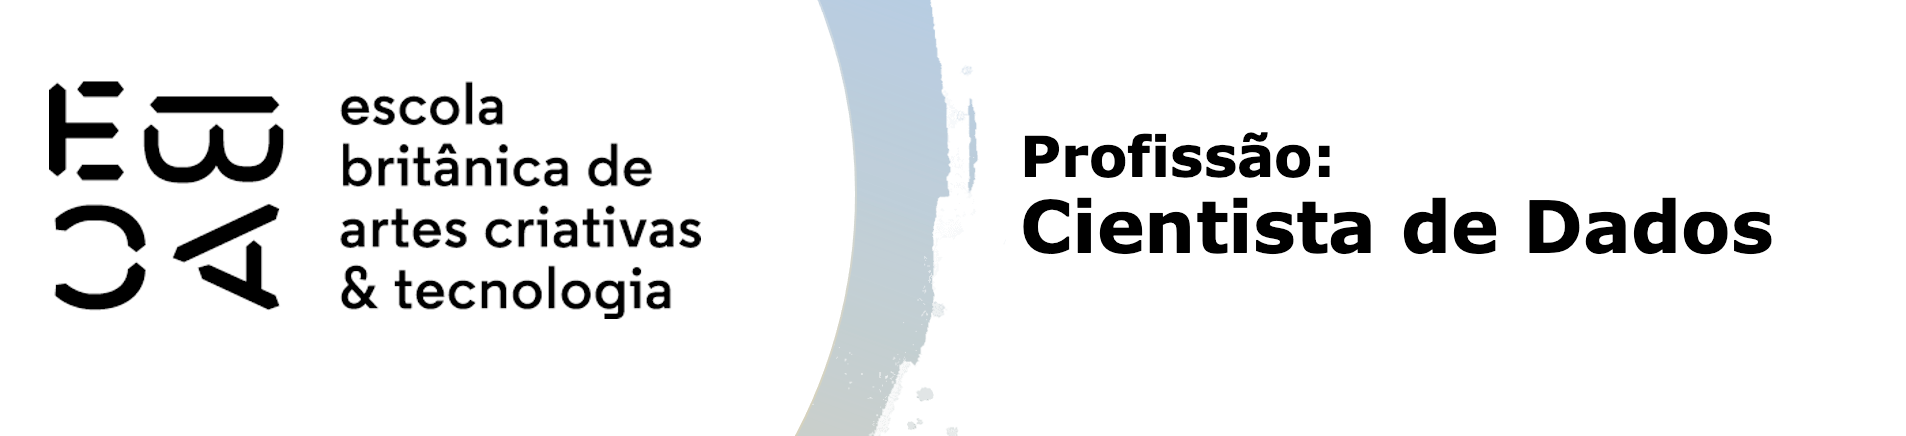

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/Users/rayssaathayde/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


In [3]:
#ajustando base a partir de janeiro de 2020
df = df.loc[df['Data Emissão'] >= '2020-01-01']

print(f''' 
    Data mínima: {df['Data Emissão'].min()}.
    Data máxima: {df['Data Emissão'].max()}.
    ''') 

 
    Data mínima: 2020-01-01 00:00:00.
    Data máxima: 2021-12-31 00:00:00.
    


## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [6]:
#dia da semana
df['dia_da_semana'] = df['Data Emissão'].dt.day_name()

#dummy para fim de semana
df['fim_de_semana'] = df['Data Emissão'].dt.dayofweek // 5

#dia do mês
df['dia_do_mes'] = df['Data Emissão'].dt.day

#mês
df['mês'] = df['Data Emissão'].dt.month

#trimestre
df['trimestre'] = df['Data Emissão'].dt.quarter

#ano
df['ano'] = df['Data Emissão'].dt.year

df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria,dia_da_semana,fim_de_semana,dia_do_mes,trimestre,mês,ano
64598,05.234.750/0001-41,TX BURGER LTDA,77882,2020-01-01,78.80,2020-08-01,0.0,A Calcular,2019,2,0.0,0,não definido,Wednesday,0,1,1,1,2020
64599,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,2020-01-01,22.71,2020-01-01,0.0,A Calcular,2019,2,0.0,0,Mercado,Wednesday,0,1,1,1,2020
64600,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,2020-01-01,35.90,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Alimentos,Wednesday,0,1,1,1,2020
64601,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,2020-01-01,21.77,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Farmácia,Wednesday,0,1,1,1,2020
64602,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,2020-01-01,80.95,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Restaurantes,Wednesday,0,1,1,1,2020


In [7]:
quantis = [5, 10, 20, 50]

for valor in quantis:
    df['Valor_NF_cat_' + str(valor)] = pd.qcut(df['Valor NF'], q=valor)
    
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,...,dia_da_semana,fim_de_semana,dia_do_mes,trimestre,mês,ano,Valor_NF_cat_5,Valor_NF_cat_10,Valor_NF_cat_20,Valor_NF_cat_50
64598,05.234.750/0001-41,TX BURGER LTDA,77882,2020-01-01,78.80,2020-08-01,0.0,A Calcular,2019,2,...,Wednesday,0,1,1,1,2020,"(49.04, 90.82]","(66.205, 90.82]","(77.9, 90.82]","(75.037, 79.99]"
64599,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,2020-01-01,22.71,2020-01-01,0.0,A Calcular,2019,2,...,Wednesday,0,1,1,1,2020,"(-0.001, 24.05]","(13.54, 24.05]","(18.97, 24.05]","(21.98, 24.05]"
64600,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,2020-01-01,35.90,2020-08-01,0.0,A Calcular,2019,2,...,Wednesday,0,1,1,1,2020,"(24.05, 49.04]","(35.48, 49.04]","(35.48, 41.562]","(35.48, 37.95]"
64601,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,2020-01-01,21.77,2020-08-01,0.0,A Calcular,2019,2,...,Wednesday,0,1,1,1,2020,"(-0.001, 24.05]","(13.54, 24.05]","(18.97, 24.05]","(19.95, 21.98]"
64602,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,2020-01-01,80.95,2020-08-01,0.0,A Calcular,2019,2,...,Wednesday,0,1,1,1,2020,"(49.04, 90.82]","(66.205, 90.82]","(77.9, 90.82]","(79.99, 85.4]"


## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [8]:
df.columns

Index(['CNPJ emit.', 'Emitente', 'No.', 'Data Emissão', 'Valor NF',
       'Data Registro', 'Créditos', 'Situação do Crédito', 'Ano', 'Semestre',
       'Retorno', 'flag_credito', 'categoria', 'dia_da_semana',
       'fim_de_semana', 'dia_do_mes', 'trimestre', 'mês', 'ano',
       'Valor_NF_cat_5', 'Valor_NF_cat_10', 'Valor_NF_cat_20',
       'Valor_NF_cat_50'],
      dtype='object')

In [9]:
df_ = df.copy()
df_.drop(columns=['CNPJ emit.', 
                  'Emitente', 
                  'No.', 
                  'Data Emissão',
                  'Data Registro', 
                  'Créditos', 
                  'Situação do Crédito',
                  'Retorno'], inplace=True)

metadados = pd.DataFrame({'dtype':df_.dtypes})
metadados

,dtype
Valor NF,float64
Ano,int64
Semestre,int64
flag_credito,int64
categoria,object
dia_da_semana,object
fim_de_semana,int32
dia_do_mes,int32
trimestre,int32
mês,int32


In [10]:
metadados['papel'] = 'covariavel'
metadados.loc['flag_credito','papel'] = 'resposta'
metadados['nunique'] = df_.nunique()
metadados

,dtype,papel,nunique
Valor NF,float64,covariavel,28381
Ano,int64,covariavel,3
Semestre,int64,covariavel,2
flag_credito,int64,resposta,2
categoria,object,covariavel,9
dia_da_semana,object,covariavel,7
fim_de_semana,int32,covariavel,2
dia_do_mes,int32,covariavel,31
trimestre,int32,covariavel,4
mês,int32,covariavel,12


In [11]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [12]:
for var in metadados[metadados.papel == 'covariavel'].index:
    if metadados.loc[var, 'nunique'] > 5:
        if pd.api.types.is_numeric_dtype(df_[var]):
            bins = pd.qcut(df_[var], 5, duplicates='drop')
            metadados.loc[var, 'IV'] = IV(bins, df_.flag_credito)
        else:
            metadados.loc[var, 'IV'] = IV(df_[var], df_.flag_credito)
    else:
        metadados.loc[var, 'IV'] = IV(df_[var], df_.flag_credito)

metadados

,dtype,papel,nunique,IV
Valor NF,float64,covariavel,28381,0.038990
Ano,int64,covariavel,3,inf
Semestre,int64,covariavel,2,0.004874
flag_credito,int64,resposta,2,NaN
categoria,object,covariavel,9,0.278826
dia_da_semana,object,covariavel,7,0.005878
fim_de_semana,int32,covariavel,2,0.004599
dia_do_mes,int32,covariavel,31,0.003614
trimestre,int32,covariavel,4,0.003554
mês,int32,covariavel,12,0.003639


In [13]:
metadados.loc[metadados['IV'] <= 0.02, 'IV_cat'] = 'inútil' 
metadados.loc[(metadados['IV'] > 0.02) & (metadados['IV'] <= 0.1), 'IV_cat'] = 'fraco'
metadados.loc[(metadados['IV'] > 0.1) & (metadados['IV'] <= 0.3), 'IV_cat'] = 'médio'
metadados.loc[(metadados['IV'] > 0.3) & (metadados['IV'] <= 0.5), 'IV_cat'] = 'forte'
metadados.loc[metadados['IV'] > 0.5, 'IV_cat'] = 'suspeito' 

metadados

,dtype,papel,nunique,IV,IV_cat
Valor NF,float64,covariavel,28381,0.038990,fraco
Ano,int64,covariavel,3,inf,suspeito
Semestre,int64,covariavel,2,0.004874,inútil
flag_credito,int64,resposta,2,NaN,NaN
categoria,object,covariavel,9,0.278826,médio
dia_da_semana,object,covariavel,7,0.005878,inútil
fim_de_semana,int32,covariavel,2,0.004599,inútil
dia_do_mes,int32,covariavel,31,0.003614,inútil
trimestre,int32,covariavel,4,0.003554,inútil
mês,int32,covariavel,12,0.003639,inútil


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

> A variável que parecem apresentar maior poder de discriminação segundo o IV é `categoria`. 

> Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV, uma vez que a variável `Valor NF` apresenta maior poder de discriminação com mais de 50 categorias.

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

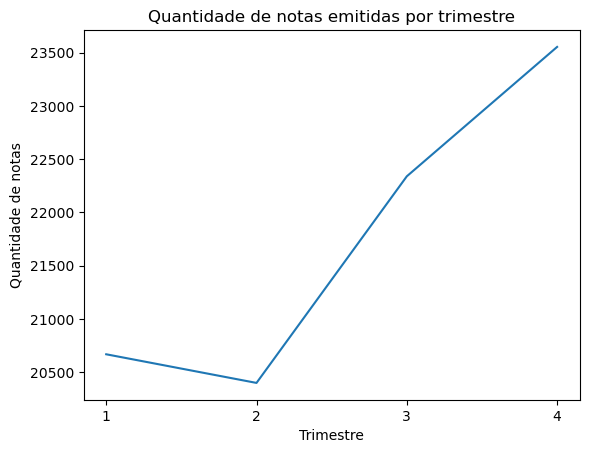

In [12]:
#quantidade de notas registradas na base por período
qtd_notas = df.groupby('trimestre')['Valor NF'].count()
qtd_notas.plot()

plt.title('Quantidade de notas emitidas por trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de notas')
plt.xticks([1, 2, 3, 4]);

In [13]:
#quantidade de notas por categoria e por período
qtd_notas_cat = df.groupby(['trimestre', 'categoria'])['Valor NF'].count()
qtd_notas_cat

trimestre  categoria   
1          Alimentos       1282
           Auto posto       152
           Construção      3854
           Farmácia        2432
           Mercado         6727
           Restaurantes     754
           Varejo           949
           Vestuário        429
           não definido    4088
2          Alimentos       1167
           Auto posto       116
           Construção      3806
           Farmácia        2492
           Mercado         6555
           Restaurantes     426
           Varejo          1266
           Vestuário        426
           não definido    4144
3          Alimentos       1227
           Auto posto       136
           Construção      4079
           Farmácia        2569
           Mercado         7093
           Restaurantes     513
           Varejo          1340
           Vestuário        456
           não definido    4925
4          Alimentos       1374
           Auto posto       136
           Construção      4308
           Farmá

In [14]:
df1 = qtd_notas_cat.unstack()
df1

categoria,Alimentos,Auto posto,Construção,Farmácia,Mercado,Restaurantes,Varejo,Vestuário,não definido
trimestre,,,,,,,,,
1,1282,152,3854,2432,6727,754,949,429,4088
2,1167,116,3806,2492,6555,426,1266,426,4144
3,1227,136,4079,2569,7093,513,1340,456,4925
4,1374,136,4308,2696,7183,486,1511,609,5250


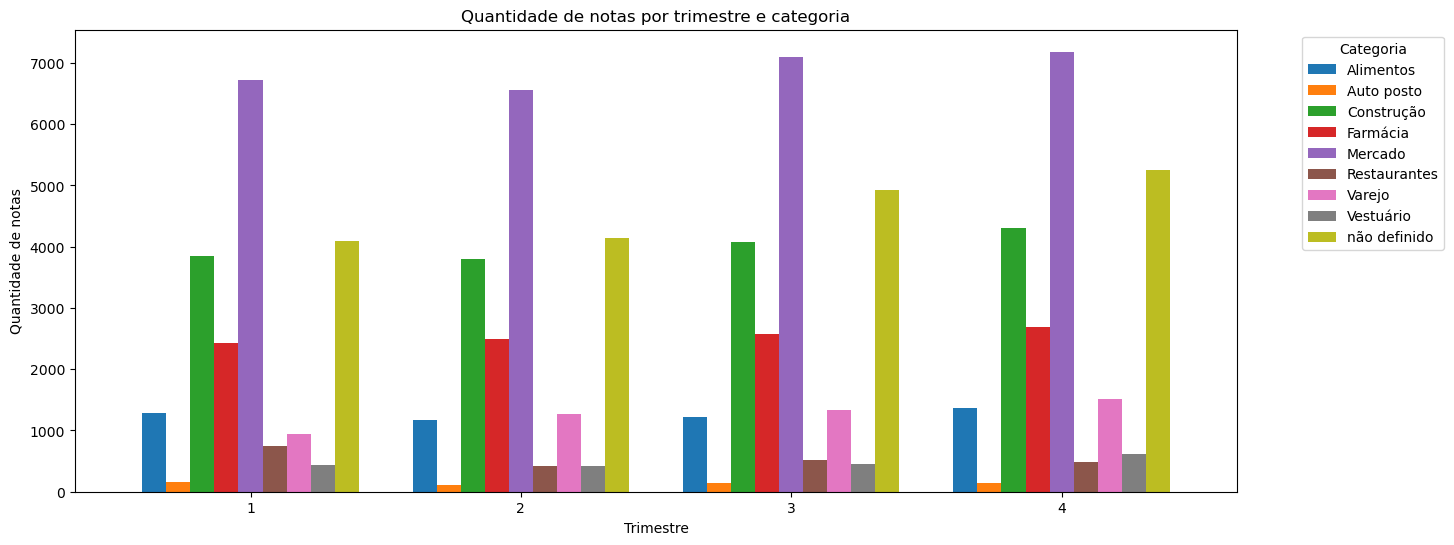

In [15]:
df1.plot(kind='bar', figsize=(15, 6), width=.8)
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de notas')
plt.title('Quantidade de notas por trimestre e categoria')
plt.xticks(rotation=0)
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
#proporção de notas com crédito por categoria por período
df2 = df[df['flag_credito'] == 1].groupby(['trimestre', 'categoria'])['Valor NF'].count().unstack()
df2

categoria,Alimentos,Auto posto,Construção,Farmácia,Mercado,Restaurantes,Varejo,Vestuário,não definido
trimestre,,,,,,,,,
1,908,34,1811,638,3271,590,172,115,1607
2,736,28,1680,817,3102,299,148,79,1342
3,849,41,2004,943,3370,397,184,119,1813
4,949,32,2028,1184,3434,340,197,130,1927


In [17]:
proporcao = (df2 / df1) * 100
proporcao

categoria,Alimentos,Auto posto,Construção,Farmácia,Mercado,Restaurantes,Varejo,Vestuário,não definido
trimestre,,,,,,,,,
1,70.826833,22.368421,46.990140,26.233553,48.624944,78.249337,18.124341,26.806527,39.310176
2,63.067695,24.137931,44.140830,32.784912,47.322654,70.187793,11.690363,18.544601,32.384170
3,69.193154,30.147059,49.129689,36.706890,47.511631,77.387914,13.731343,26.096491,36.812183
4,69.068413,23.529412,47.075209,43.916914,47.807323,69.958848,13.037723,21.346470,36.704762


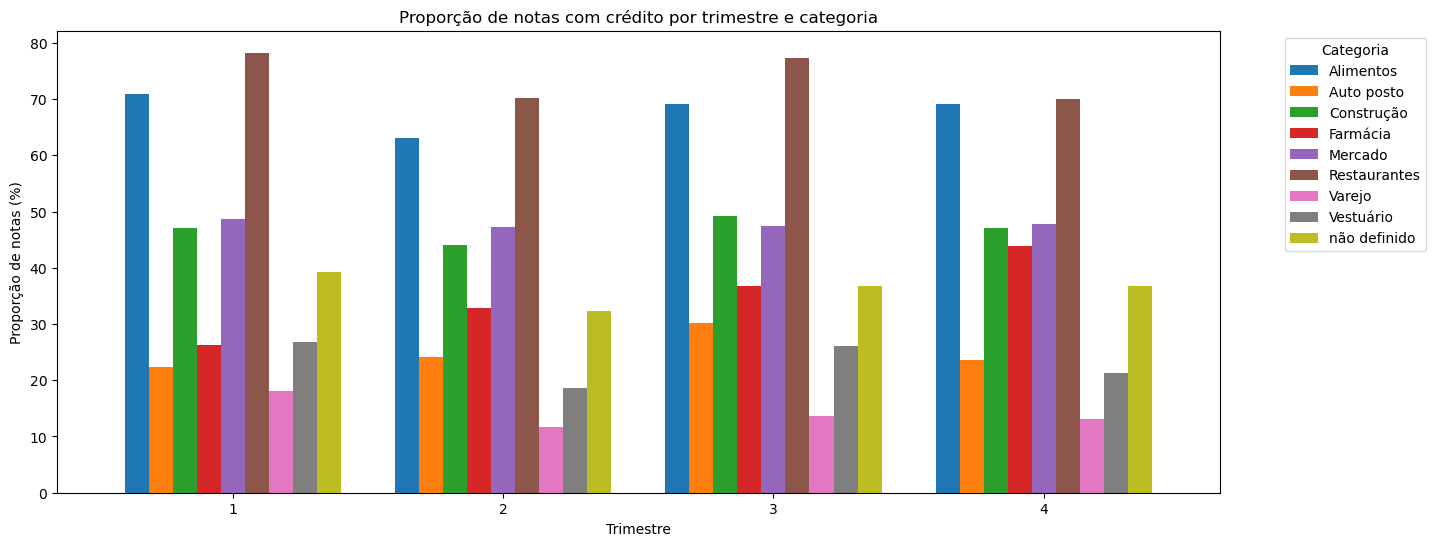

In [18]:
proporcao.plot(kind='bar', figsize=(15, 6), width=.8)
plt.xlabel('Trimestre')
plt.ylabel('Proporção de notas (%)')
plt.title('Proporção de notas com crédito por trimestre e categoria')
plt.xticks(rotation=0)
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [15]:
df_woe = df[['flag_credito', 'categoria', 'ano', 'mês']]

#Criação das colunas de frequência
freq = df_woe.groupby(['ano', 'mês', 'categoria'
                    ])['flag_credito'].value_counts().unstack(fill_value=0)
freq.columns = ['flag_credito_0', 'flag_credito_1']

# Reset do índice múltiplo
freq.reset_index(inplace=True)

# Mesclando as colunas de frequência com o df
df_woe = df_woe.merge(freq, on=['ano', 'mês', 'categoria'], how='left')

# Remoção da coluna original 'flag_credito'
df_woe.drop('flag_credito', axis=1, inplace=True)


# Criar coluna 'mes-ano' formatada
df_woe['mes_ano'] = df_woe.apply(lambda row: f"{row['mês']}-{row['ano']}", axis=1)

# Converter 'mes-ano' para o formato de data
df_woe['mes_ano'] = pd.to_datetime(df_woe['mes_ano'], format='%m-%Y')
 
# Remoção da coluna original 'flag_credito'
df_woe.drop('ano', axis=1, inplace=True)
df_woe.drop('mês', axis=1, inplace=True)

# Removendo as linhas duplicadas
df_woe.drop_duplicates(inplace=True)

df_woe

,categoria,flag_credito_0,flag_credito_1,mes_ano
0,não definido,340,328,2020-01-01
1,Mercado,538,478,2020-01-01
2,Alimentos,56,222,2020-01-01
3,Farmácia,292,63,2020-01-01
4,Restaurantes,35,211,2020-01-01
...,...,...,...,...
48272,Auto posto,17,4,2021-07-01
48914,Auto posto,15,5,2021-02-01
48983,Vestuário,51,22,2021-01-01
51548,Auto posto,15,14,2021-09-01


In [19]:
rotulo_ev, rotulo_nev = ('flag_credito_1', 'flag_credito_0')

df_woe['pct_evento'] = df_woe[rotulo_ev] / (df_woe[rotulo_ev] + df_woe[rotulo_nev])
df_woe['pct_nao_evento'] = df_woe[rotulo_nev] / (df_woe[rotulo_ev] + df_woe[rotulo_nev])
df_woe['woe'] = np.log(df_woe.pct_evento / df_woe.pct_nao_evento)

df_woe

,categoria,flag_credito_0,flag_credito_1,mes_ano,pct_evento,pct_nao_evento,woe
0,não definido,340,328,2020-01-01,0.491018,0.508982,-0.035932
1,Mercado,538,478,2020-01-01,0.470472,0.529528,-0.118248
2,Alimentos,56,222,2020-01-01,0.798561,0.201439,1.377326
3,Farmácia,292,63,2020-01-01,0.177465,0.822535,-1.533619
4,Restaurantes,35,211,2020-01-01,0.857724,0.142276,1.796510
...,...,...,...,...,...,...,...
48272,Auto posto,17,4,2021-07-01,0.190476,0.809524,-1.446919
48914,Auto posto,15,5,2021-02-01,0.250000,0.750000,-1.098612
48983,Vestuário,51,22,2021-01-01,0.301370,0.698630,-0.840783
51548,Auto posto,15,14,2021-09-01,0.482759,0.517241,-0.068993


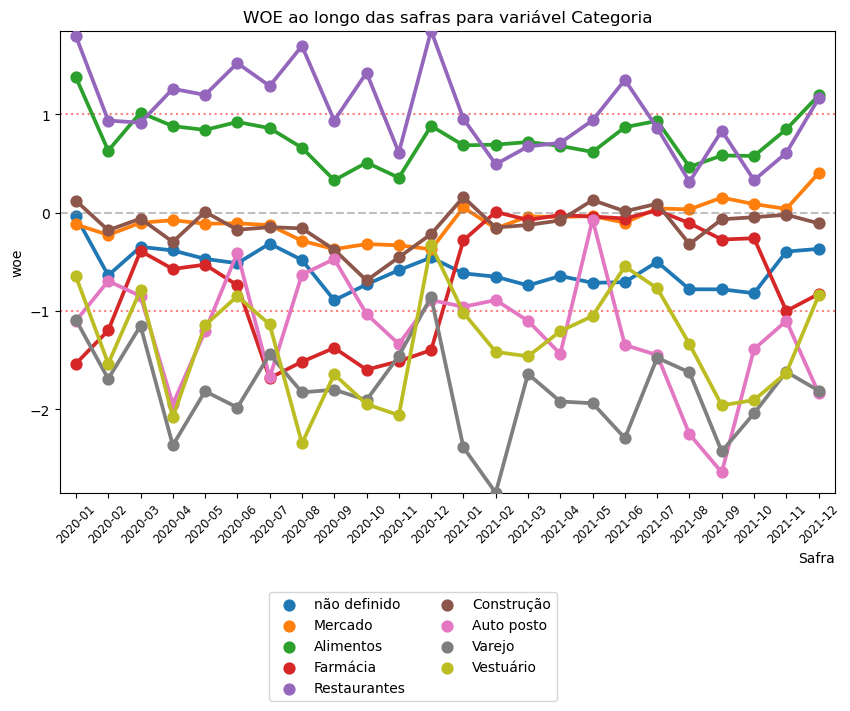

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
variavel='categoria'

# Comando principal do gráfico
sns.pointplot(data=df_woe.reset_index(), y = 'woe', x = 'mes_ano', hue=variavel, ax=ax);

# Rotacionar os rótulos do eixo X
labs = df_woe.mes_ano.sort_values().unique()
labs2 = [x.to_period('M') for x in labs]

ax.set_xticklabels(labs2,rotation=45, fontsize='small')
ax.legend(bbox_to_anchor=(.65, -.2), ncol=2)

#limites do gráfico - mostrando 1 e -1 para ter referência
ymax = max(1.2, max(df_woe.woe))
ymin = min(-1.2, min(df_woe.woe))
ax.set_ylim([ymin, ymax])

# Linhas de referência
ax.axhline(1, linestyle=':'  , color='red', alpha=.5)
ax.axhline(0, linestyle='--' , color='grey', alpha=.5)
ax.axhline(-1, linestyle=':' , color='red', alpha=.5)

# Títulos
ax.set_title(f'WOE ao longo das safras para variável {variavel.capitalize()}')
ax.set_xlabel('Safra', loc='right');

In [26]:
df_woe.head()

,categoria,flag_credito_0,flag_credito_1,mes_ano,pct_evento,pct_nao_evento,woe
0,não definido,340,328,2020-01-01,0.491018,0.508982,-0.035932
1,Mercado,538,478,2020-01-01,0.470472,0.529528,-0.118248
2,Alimentos,56,222,2020-01-01,0.798561,0.201439,1.377326
3,Farmácia,292,63,2020-01-01,0.177465,0.822535,-1.533619
4,Restaurantes,35,211,2020-01-01,0.857724,0.142276,1.796510


<Axes: xlabel='mes_ano'>

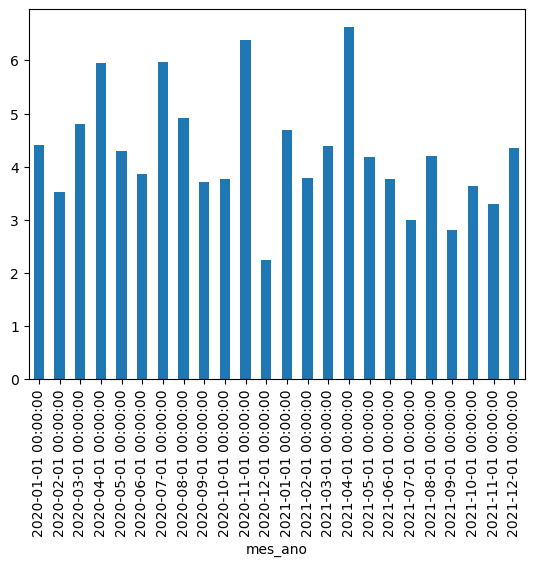

In [29]:
iv_categoria = ((df_woe.pct_evento - df_woe.pct_nao_evento)*df_woe.woe).groupby(df_woe['mes_ano']).sum();
iv_categoria.plot.bar()

## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

> Considerando os dados a partir de 2020, os setores com notas que apresentam maior possibilidade de retorno são alimentos e restaurantes. <br>
Alguns setores (como o varejo, autoposto e vestuário) apresentaram grande variação ao longo do tempo, mas os outros setores aparentam ter uma maior estabilidade.